# code excerpted from https://www.lucypark.kr/docs/2015-pyconkr/#1

In [1]:
import codecs
def read_data(filename):
    with codecs.open(filename, 'r', 'utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data
train_data = read_data('ratings_train.txt')
test_data = read_data('ratings_test.txt')

In [2]:
print(len(train_data))      # nrows: 150000
print(len(train_data[0]))   # ncols: 3
print(len(test_data))       # nrows: 50000
print(len(test_data[0]))     # ncols: 3

150000
3
50000
3


### too long time to process... (use pickled data)

In [ ]:
#from konlpy.tag import Twitter
#pos_tagger = Twitter()
#def tokenize(doc):
#    # norm, stem은 optional
#    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]
#train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
#test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
## 잘 들어갔는지 확인
#from pprint import pprint
#pprint(train_docs[0])
## => [(['아/Exclamation',
##   '더빙/Noun',
##   '../Punctuation',
##   '진짜/Noun',
##   '짜증/Noun',
##   '나다/Verb',
##   '목소리/Noun'],
##  '0')]

In [ ]:
#import pickle
#pickle.dump(train_docs, open('senti.traindocs.bin','wb'))
#pickle.dump(test_docs, open('senti.testdocs.bin','wb'))

In [3]:
import pickle
from pprint import pprint
train_docs = pickle.load(open('senti.traindocs.bin','rb'))
test_docs = pickle.load(open('senti.testdocs.bin','rb'))
pprint(train_docs[0])

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')


In [4]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

2159921


In [5]:
import nltk
text = nltk.Text(tokens, name='NMSC')
print(text)

<Text: NMSC>


In [6]:
print(len(text.tokens)) 

2159921


In [7]:
print(len(set(text.tokens)))

49895


In [8]:
pprint(text.vocab().most_common(10))

[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118)]


In [9]:
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

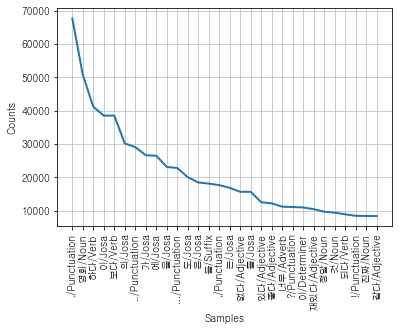

In [10]:
text.plot(30)     # Plot sorted frequency of top 30 tokens

### Warning: more features need much more memory...

In [20]:
# 여기서는 최빈도 단어 100개를 피쳐로 사용
# WARNING: 쉬운 이해를 위한 코드이며 time/memory efficient하지 않습니다
selected_words = [f[0] for f in text.vocab().most_common(100)]
def term_exists(doc):
    return {'exists({})'.format(word): (word in set(doc)) for word in selected_words}
# 시간 단축을 위한 꼼수로 training corpus의 일부만 사용할 수 있음
train_docs = train_docs[:2000]
train_xy = [(term_exists(d), c) for d, c in train_docs]
test_xy = [(term_exists(d), c) for d, c in test_docs[:1000]]

In [21]:
# 초간단함
classifier = nltk.NaiveBayesClassifier.train(train_xy)
print(nltk.classify.accuracy(classifier, test_xy))
classifier.show_most_informative_features(10)
# => Most Informative Features
#        exists(수작/Noun) = True                1 : 0      =     38.0 : 1.0
#        exists(최악/Noun) = True                0 : 1      =     30.1 : 1.0
#      exists(♥/Foreign) = True                1 : 0      =     24.5 : 1.0
#        exists(노잼/Noun) = True                0 : 1      =     22.1 : 1.0
#        exists(낭비/Noun) = True                0 : 1      =     19.5 : 1.0
#       exists(쓰레기/Noun) = True                0 : 1      =     19.4 : 1.0
#        exists(여운/Noun) = True                1 : 0      =     18.9 : 1.0
#       exists(발연기/Noun) = True                0 : 1      =     16.9 : 1.0
#         exists(굿/Noun) = True                1 : 0      =     16.9 : 1.0
#       exists(최고다/Noun) = True                1 : 0      =     15.9 : 1.0

0.719
Most Informative Features
  exists(재미없다/Adjective) = True                0 : 1      =     16.6 : 1.0
   exists(아깝다/Adjective) = True                0 : 1      =     15.8 : 1.0
        exists(쓰레기/Noun) = True                0 : 1      =     14.7 : 1.0
         exists(최고/Noun) = True                1 : 0      =     12.2 : 1.0
   exists(재밌다/Adjective) = True                1 : 0      =      9.0 : 1.0
          exists(뭐/Noun) = True                0 : 1      =      7.0 : 1.0
  exists(!!/Punctuation) = True                1 : 0      =      6.2 : 1.0
  exists(지루하다/Adjective) = True                0 : 1      =      4.6 : 1.0
   exists(!/Punctuation) = True                1 : 0      =      4.1 : 1.0
  exists(재미있다/Adjective) = True                1 : 0      =      3.9 : 1.0


In [37]:
test_docs[0]

(['굳다/Adjective', 'ㅋ/KoreanParticle'], '1')

In [22]:
pprint(test_xy[0])

({'exists(!!/Punctuation)': False,
  'exists(!/Punctuation)': False,
  'exists(,/Punctuation)': False,
  'exists(..../Punctuation)': False,
  'exists(.../Punctuation)': False,
  'exists(../Punctuation)': False,
  'exists(./Punctuation)': False,
  'exists(1/Number)': False,
  'exists(?/Punctuation)': False,
  'exists(~/Punctuation)': False,
  'exists(ㅋㅋ/KoreanParticle)': False,
  'exists(ㅋㅋㅋ/KoreanParticle)': False,
  'exists(가/Josa)': False,
  'exists(가다/Verb)': False,
  'exists(감독/Noun)': False,
  'exists(감동/Noun)': False,
  'exists(같다/Adjective)': False,
  'exists(거/Noun)': False,
  'exists(것/Noun)': False,
  'exists(게/Josa)': False,
  'exists(고/Josa)': False,
  'exists(과/Josa)': False,
  'exists(그/Noun)': False,
  'exists(그냥/Noun)': False,
  'exists(그렇다/Adjective)': False,
  'exists(까지/Josa)': False,
  'exists(나/Noun)': False,
  'exists(나오다/Verb)': False,
  'exists(내/Noun)': False,
  'exists(내용/Noun)': False,
  'exists(너무/Adverb)': False,
  'exists(는/Josa)': False,
  'exists(다/Adver

In [34]:
test_docs[2]

(['뭐/Noun',
  '야/Josa',
  '이/Noun',
  '평점/Noun',
  '들/Suffix',
  '은/Josa',
  '..../Punctuation',
  '나쁘다/Adjective',
  '않다/Verb',
  '10/Number',
  '점/Noun',
  '짜다/Verb',
  '리/Noun',
  '는/Josa',
  '더/Noun',
  '더욱/Noun',
  '아니다/Adjective'],
 '0')

In [35]:
classifier.classify(train_xy[2][0])

'1'